In [6]:
import nbsetup
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import ergodicpy as ep

In [47]:
def continous_entropy(samples):
    data = []
    x = range(2,20)
    for b in x:
        bins = np.linspace(samples.min(), samples.max(), b+1)
        pk, _ = np.histogram(samples, bins)
        dist = ep.shannon_entropy(pk)
        logb = np.log(b)
        diff = sp.stats.differential_entropy(samples)
        
        data.append({
            'bins': b,
            'standard entropy': dist,
            'log(bins)': logb,
            'relative entropy + 1': 1+(dist-logb),
            'relative entropy': dist-logb,
            'negative relative entropy': logb-dist,
            'differential entropy': diff,
        })
    df = pd.DataFrame(data=data)
    for key in data[0].keys():
        if key != 'bins':
            g = sns.lineplot(data=df, x='bins', y=key, label=key)
    g.axhline(0.0, linestyle='dashed', color='grey')
    return

# Continuous for various bins

- Looking at the best techniques for continuous entropy
- For a given set of samples, looking at breaking them into different numbers of discrete bins

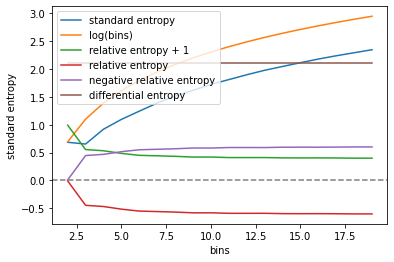

In [48]:
continous_entropy(np.random.normal(5,2,10000))

Each technqiue is consistent across different volumes of samples.

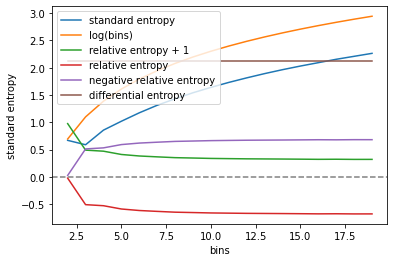

In [49]:
continous_entropy(np.random.normal(2,2,10000))

### Differential entropy
It first appears to work well, but only really for normal distributions. For power laws it's frequency negative and often infinite, which is next to useless as a reliable metric (not sure why it's even included in scipy).

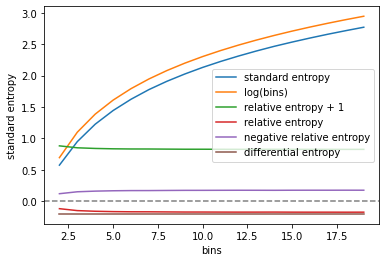

In [50]:
continous_entropy(np.random.power(2,10000))

### Relative entropy
For the highest entropy state it simply increases by log(bins). This can be thought of as each additional bin gives you log(n+1) extra information as it represents a greater level of granularity, but discounting for the existing n bins of information you already have.

Jaynes suggested you can therefore compare this highest theoretical value and the measured value. Relative entropy is then defined as H-log(n).

However, for low entropy values this can lead to negative entropies. Similarly, negative relative entropy gives positive values but since it's compared against the maximum state - for high entropy systems it gives low entropies while for low entropy systems it gives high entropies.

This can be corrected for by adding 1 to the relative entropy. This then normalises the entropy between 0 and 1, where 1 is the highest possible entropy state of uniform and the distribution approaches 0 for extremely non-uniform distributions.

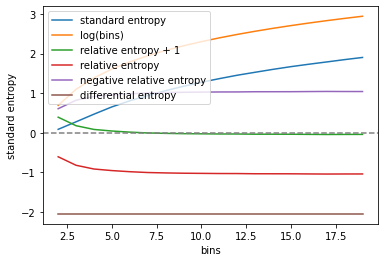

In [51]:
# Extreme power law distribution (low entropy)

continous_entropy(np.random.power(20,10000))

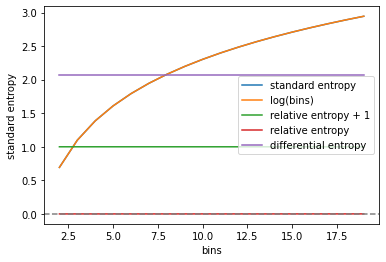

In [43]:
# Uniform distribution (high entropy)

continous_entropy(np.random.uniform(2,10,10000))